In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import random
from GraphLaplacian.binary import GraphLaplacian, MBOBinary
from GraphLaplacian.multilabel import GLMultiClass, MBOMultiClass
from GraphLaplacian.helper import plot
import pdb
from IPython.display import clear_output
from sklearn.datasets import make_moons, make_circles, make_classification
import scipy
import pdb
from datetime import datetime

sns.set()

In [2]:
colors = ["#ffffff", "#ff6361", "#003f5c", "#63005c", "#006355", "#5c3f00"]
sns.set_palette(sns.color_palette(colors))

### Data

In [3]:
cov1 = np.array([[6,0],[0,2]])
blue = np.random.multivariate_normal(mean=[0,2], cov=cov1, size=500)
cov2 = np.array([[6,0],[0,2]])
red = np.random.multivariate_normal(mean=[0,-3], cov=cov2, size=500)
Y = list(np.ones(len(blue))) + list(np.ones(len(red))*0)
X = list(blue) + list(red)

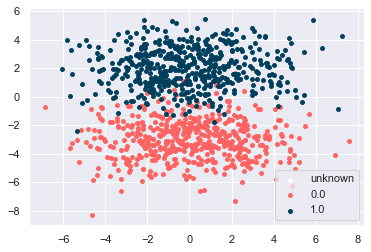

In [4]:
plot(X, Y, [])

In [6]:
N = 10
X0 = list(blue[:N]) + list(red[:N])
Y0 = list(np.ones(len(blue)))[:N] + list(np.ones(len(red))*0)[:N]
X1 = list(blue[N:]) + list(red[N:])
Y1 = list(np.ones(len(blue)))[N:] + list(np.ones(len(red))*0)[N:]
h = max(find_h(X, Xr, 10))

MBO = MBOBinary(X0, Y0, X1, cov=h, dT=16.6, Nd=1)
MBO.solve()

NameError: name 'find_h' is not defined

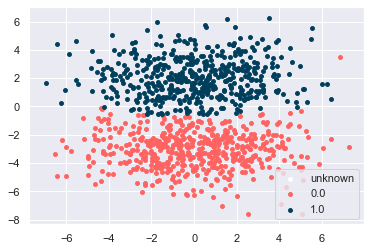

None

In [157]:
display(plot(X0 + X1, MBO.Y, []))

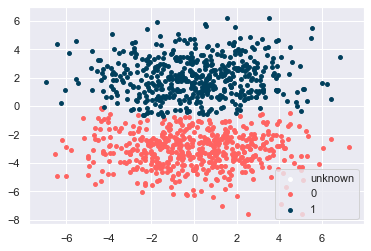

None

In [155]:
GL = GraphLaplacian(X0, Y0, X1, cov=h)
GL.solve()
display(plot(X0 + X1, GL.Y, []))

## Logic

In [146]:
def find_optimum_for_dt(min_dt, max_dt, s):
    dts = [min_dt]
    pen = list()
    ys = list()
    MBO = MBOBinary(X0, Y0, X1, cov=s, dT=min_dt, Nd=1)
    MBO.solve()
    min_pen = sum(MBO.Y)*1.0 / len(MBO.Y)
    pen.append(min_pen)
    ys.append(MBO.Y)
    MBO = MBOBinary(X0, Y0, X1, cov=s, dT=max_dt, Nd=1)
    MBO.solve()
    max_pen = sum(MBO.Y)*1.0 / len(MBO.Y)
    if min_pen == max_pen:
        raise(Exception("min = max =", max_pen))
    while 2*(max_dt - min_dt) / (min_dt + max_dt) > 0.01:
        print("Bisection Error : ", 2*(max_dt - min_dt) / (min_dt + max_dt))
        mid_dt = (max_dt + min_dt) / 2
        MBO = MBOBinary(X0, Y0, X1, cov=s, dT=mid_dt, Nd=1)
        MBO.solve()
        mid_pen = sum(MBO.Y)*1.0 / len(MBO.Y)
        dts.append(mid_dt)
        pen.append(min_pen)
        ys.append(MBO.Y)
        if mid_pen<1:
            min_dt = mid_dt
        else:
            max_dt = mid_dt
    print("***Optimum dt", mid_dt)
    return dts, pen, ys, mid_dt

In [147]:
# Get h
Xr = random.choices(X, k=10)

def find_h(X, sample, k=5):
    tree = scipy.spatial.cKDTree(X)
    _func = lambda point: np.mean([x for x in tree.query(point, k = k+1)[0] if x > 0])
    hs = [_func(x) for x in sample]
    return hs

In [149]:
h = max(find_h(X, Xr, 10))
sigma = h
X1 = list(X[100:])
X0 = list(X[:100])
Y0 = [1] * 100
dts, pen, ys, mid_dt = find_optimum_for_dt(0.01, 100, sigma)

Interation 0 error 0.0
Interation 0 error 0.9
Interation 1 error 0.0
Bisection Error :  1.9996000399960001


KeyboardInterrupt: 

In [49]:
def find_optimum_for_dt(min_dt, max_dt, s):
    MBO = MBOBinary(X0, Y0, X1, cov=s, dT=min_dt, Nd=1)
    MBO.solve()
    min_pen = sum(MBO.Y)*1.0 / len(MBO.Y)
    MBO = MBOBinary(X0, Y0, X1, cov=s, dT=max_dt, Nd=1)
    MBO.solve()
    max_pen = sum(MBO.Y)*1.0 / len(MBO.Y)
    if min_pen == max_pen:
        raise(Exception("min = max =", max_pen))
    while 2*(max_dt - min_dt) / (min_dt + max_dt) > 0.01:
        print("Bisection Error : ", 2*(max_dt - min_dt) / (min_dt + max_dt))
        mid_dt = (max_dt + min_dt) / 2
        MBO = MBOBinary(X0, Y0, X1, cov=s, dT=mid_dt, Nd=1)
        MBO.solve()
        mid_pen = sum(MBO.Y)*1.0 / len(MBO.Y)
        if mid_pen<1:
            min_dt = mid_dt
        else:
            max_dt = mid_dt
    print("***Optimum dt", max_dt)
    return max_dt

In [50]:
N0s = [5,10,20,50,100]
optimum_dt = list()
for N0 in N0s:
    X1 = list(X[N0:])
    X0 = list(X[:N0])
    Y0 = [1] * N0
    optimum_dt.append(find_optimum_for_dt(0.01, 100, sigma))

Interation 0 error 0.0
Interation 0 error 0.995
Interation 1 error 0.0
Bisection Error :  1.9996000399960001
Interation 0 error 0.0
Bisection Error :  0.666577780740642
Interation 0 error 0.995
Interation 1 error 0.0
Bisection Error :  0.39993600383976957
Interation 0 error 0.995
Interation 1 error 0.0
Bisection Error :  0.22218271912184598
Interation 0 error 0.0
Bisection Error :  0.10524543057580273
Interation 0 error 0.995
Interation 1 error 0.0
Bisection Error :  0.05404470484586261
Interation 0 error 0.9899799599198397
Interation 1 error 0.501
Interation 2 error 0.0
Bisection Error :  0.027392456732711862
Interation 0 error 0.0
Bisection Error :  0.013603072969419247
Interation 0 error 0.0
***Optimum dt 57.81671874999999
Interation 0 error 0.0
Interation 0 error 0.99
Interation 1 error 0.0
Bisection Error :  1.9996000399960001
Interation 0 error 0.99
Interation 1 error 0.0
Bisection Error :  1.9992002399280218
Interation 0 error 0.0
Bisection Error :  0.666488918513581
Interation 

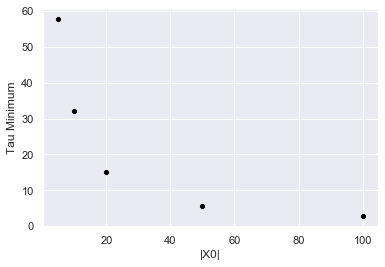

In [51]:
data = list(zip(N0s, optimum_dt))
df = pd.DataFrame(data, columns=["|X0|", "Tau Minimum"])
sns.scatterplot(data=df, x="|X0|", y="Tau Minimum")

In [52]:
df = df.sort_values(["|X0|"])
df.to_csv("output/correlation/[2D]N0 vs Tau_sigma3.csv", index=False, encoding="utf-8")

## Change sigma

In [36]:
# Get h
Xr = random.choices(X, k=10)

def find_h(X, sample, k=5):
    tree = scipy.spatial.cKDTree(X)
    _func = lambda point: np.mean([x for x in tree.query(point, k = k+1)[0] if x > 0])
    hs = [_func(x) for x in sample]
    return hs

In [37]:
h = max(find_h(X, Xr, 10))
sigma = 5*h

In [41]:
N0s = [5,10,20,50,100]
optimum_dt = list()
for N0 in N0s:
    X1 = list(X[N0:])
    X0 = list(X[:N0])
    Y0 = [1] * N0
    optimum_dt.append(find_optimum_for_dt(0.01, 100, sigma))

Interation 0 error 0.0
Interation 0 error 0.995
Interation 1 error 0.0
Bisection Error :  1.9996000399960001
Interation 0 error 0.0
Bisection Error :  0.666577780740642
Interation 0 error 0.995
Interation 1 error 0.0
Bisection Error :  0.39993600383976957
Interation 0 error 0.995
Interation 1 error 0.0
Bisection Error :  0.22218271912184598
Interation 0 error 0.0
Bisection Error :  0.10524543057580273
Interation 0 error 0.995
Interation 1 error 0.0
Bisection Error :  0.05404470484586261
Interation 0 error 0.0
Bisection Error :  0.02666211587714475
Interation 0 error 0.9914675767918089
Interation 1 error 0.414
Interation 2 error 0.0
Bisection Error :  0.01342051275512427
Interation 0 error 0.0
***Optimum dt 58.59789062499999
Interation 0 error 0.0
Interation 0 error 0.99
Interation 1 error 0.0
Bisection Error :  1.9996000399960001
Interation 0 error 0.99
Interation 1 error 0.0
Bisection Error :  1.9992002399280218
Interation 0 error 0.0
Bisection Error :  0.666488918513581
Interation 0 

In [44]:
colors = ["#000000", "#ff6361", "#003f5c", "#63005c", "#006355", "#5c3f00"]
sns.set_palette(sns.color_palette(colors))

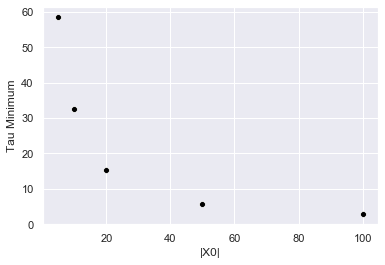

In [45]:
data = list(zip(N0s, optimum_dt))
df = pd.DataFrame(data, columns=["|X0|", "Tau Minimum"])
sns.scatterplot(data=df, x="|X0|", y="Tau Minimum")

In [46]:
df = df.sort_values(["|X0|"])
df.to_csv("output/correlation/[2D]N0 vs Tau_Sigma5.csv", index=False, encoding="utf-8")

## h

In [65]:
h = max(find_h(X, Xr, 10))
sigma = h

In [66]:
N0s = [5,10,20,50,100]
optimum_dt = list()
for N0 in N0s:
    X1 = list(X[N0:])
    X0 = list(X[:N0])
    Y0 = [1] * N0
    optimum_dt.append(find_optimum_for_dt(0.01, 100, sigma))

Interation 0 error 0.0
Interation 0 error 0.995
Interation 1 error 0.0
Bisection Error :  1.9996000399960001
Interation 0 error 0.995
Interation 1 error 0.0
Bisection Error :  1.9992002399280218
Interation 0 error 0.9583333333333334
Interation 1 error 0.88
Interation 2 error 0.0
Bisection Error :  1.998401119216548
Interation 0 error 0.0
Bisection Error :  0.6663112651184486
Interation 0 error 0.0
Bisection Error :  0.2855837200999643
Interation 0 error 0.0
Bisection Error :  0.13327646302207946
Interation 0 error 0.0
Bisection Error :  0.06448949844726005
Interation 0 error 0.0
Bisection Error :  0.03173313572191369
Interation 0 error 0.0
Bisection Error :  0.015741684607422125
Interation 0 error 0.9107142857142857
Interation 1 error 0.9160419790104948
Interation 2 error 0.333
Interation 3 error 0.0
***Optimum dt 24.81220703125
Interation 0 error 0.0
Interation 0 error 0.99
Interation 1 error 0.0
Bisection Error :  1.9996000399960001
Interation 0 error 0.99
Interation 1 error 0.0
Bise

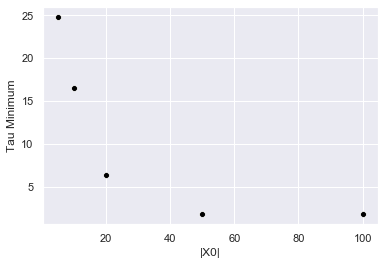

In [67]:
data = list(zip(N0s, optimum_dt))
df = pd.DataFrame(data, columns=["|X0|", "Tau Minimum"])
sns.scatterplot(data=df, x="|X0|", y="Tau Minimum")

In [68]:
df = df.sort_values(["|X0|"])
df.to_csv("output/correlation/[2D]N0 vs Tau_Sigma1.csv", index=False, encoding="utf-8")

## 0.5h

In [76]:
h = max(find_h(X, Xr, 10))
sigma = 0.5*h

In [77]:
N0s = [5,10,20,50,100]
optimum_dt = list()
for N0 in N0s:
    X1 = list(X[N0:])
    X0 = list(X[:N0])
    Y0 = [1] * N0
    optimum_dt.append(find_optimum_for_dt(0.01, 100, sigma))

Interation 0 error 0.0
Interation 0 error 0.995
Interation 1 error 0.0
Bisection Error :  1.9996000399960001
Interation 0 error 0.995
Interation 1 error 0.0
Bisection Error :  1.9992002399280218
Interation 0 error 0.9902912621359223
Interation 1 error 0.485
Interation 2 error 0.0
Bisection Error :  1.998401119216548
Interation 0 error 0.0
Bisection Error :  0.6663112651184486
Interation 0 error 0.9811320754716981
Interation 1 error 0.6137026239067055
Interation 2 error 0.314
Interation 3 error 0.0
Bisection Error :  0.3997441381653906
Interation 0 error 0.0
Bisection Error :  0.18171244763886493
Interation 0 error 0.9618320610687023
Interation 1 error 0.7200854700854701
Interation 2 error 0.5305917753259779
Interation 3 error 0.003
Interation 4 error 0.0
Bisection Error :  0.0951800749142104
Interation 0 error 0.9152542372881356
Interation 1 error 0.7765151515151515
Interation 2 error 0.5102040816326531
Interation 3 error 0.46046046046046046
Interation 4 error 0.001
Interation 5 error 

Interation 0 error 0.9077490774907749
Interation 1 error 0.3826879271070615
Interation 2 error 0.12024048096192384
Interation 3 error 0.001001001001001001
Interation 4 error 0.0
Bisection Error :  0.06440973843810088
Interation 0 error 0.9097472924187726
Interation 1 error 0.4087513340448239
Interation 2 error 0.063
Interation 3 error 0.0
Bisection Error :  0.03273193303031451
Interation 0 error 0.9084249084249084
Interation 1 error 0.3980154355016538
Interation 2 error 0.0920920920920921
Interation 3 error 0.0
Bisection Error :  0.016233131075349516
Interation 0 error 0.9090909090909091
Interation 1 error 0.40668824163969797
Interation 2 error 0.07207207207207207
Interation 3 error 0.001
Interation 4 error 0.0
***Optimum dt 6.015258789062501
Interation 0 error 0.0
Interation 0 error 0.9
Interation 1 error 0.0
Bisection Error :  1.9996000399960001
Interation 0 error 0.9
Interation 1 error 0.0
Bisection Error :  1.9992002399280218
Interation 0 error 0.9
Interation 1 error 0.0
Bisection 

,|X0|,Tau Minimum
0,5,16.024023
1,10,10.458174
2,20,6.015259
3,50,6.015259
4,100,5.624673


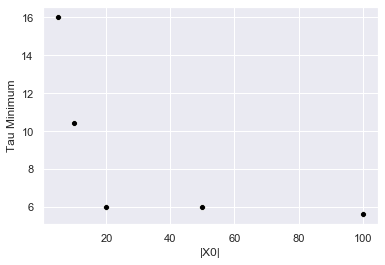

In [78]:
data = list(zip(N0s, optimum_dt))
df = pd.DataFrame(data, columns=["|X0|", "Tau Minimum"])
display(df)
sns.scatterplot(data=df, x="|X0|", y="Tau Minimum")

In [79]:
df = df.sort_values(["|X0|"])
df.to_csv("output/correlation/[2D]N0 vs Tau_Sigma0.5.csv", index=False, encoding="utf-8")

## cek

In [138]:
df5 = pd.read_csv("output/correlation/[2D]N0 vs Tau_Sigma5.csv", encoding="utf-8").assign(sigma="5h")
df3 = pd.read_csv("output/correlation/[2D]N0 vs Tau_Sigma3.csv", encoding="utf-8").assign(sigma="3h")
df1 = pd.read_csv("output/correlation/[2D]N0 vs Tau_Sigma1.csv", encoding="utf-8").assign(sigma="h")
df05 = pd.read_csv("output/correlation/[2D]N0 vs Tau_Sigma0.5.csv", encoding="utf-8").assign(sigma="0.5h")

df = pd.concat([df3, df5, df1, df05])
df.loc[:, "|X0|/|X|"] = df["|X0|"] / 1000
# df.loc[:, "Tau Minimum"] = np.log(df["Tau Minimum"])

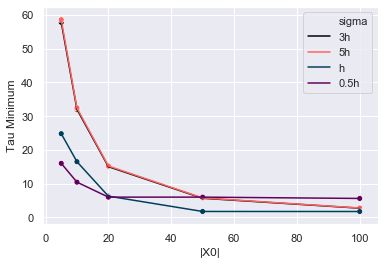

In [139]:
sns.lineplot(data=df, x="|X0|", y="Tau Minimum", hue="sigma")
sns.scatterplot(data=df, x="|X0|", y="Tau Minimum", hue="sigma", legend=False)

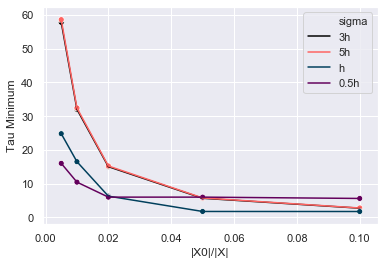

In [140]:
sns.lineplot(data=df, x="|X0|/|X|", y="Tau Minimum", hue="sigma")
sns.scatterplot(data=df, x="|X0|/|X|", y="Tau Minimum", hue="sigma", legend=False)

In [133]:
df.loc[:, "lambda"] = df.sigma.apply(lambda x: float(x.replace("h","")) if x!="h" else 1)

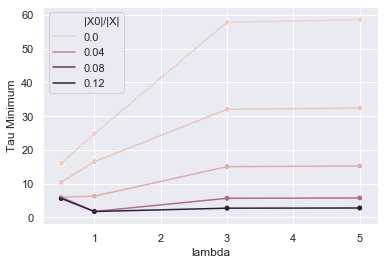

In [134]:
sns.lineplot(data=df, x="lambda", y="Tau Minimum", hue="|X0|/|X|")
sns.scatterplot(data=df, x="lambda", y="Tau Minimum", hue="|X0|/|X|", legend=False)

In [115]:
df5 = pd.read_csv("output/correlation/[2D]N0 vs Tau_Sigma5.csv", encoding="utf-8")
df5.rename(columns={"Tau Minimum":"Tau, sigma=5h"}, inplace=True)
df3 = pd.read_csv("output/correlation/[2D]N0 vs Tau_Sigma3.csv", encoding="utf-8")
df3.rename(columns={"Tau Minimum":"Tau, sigma=3h"}, inplace=True)
df1 = pd.read_csv("output/correlation/[2D]N0 vs Tau_Sigma1.csv", encoding="utf-8")
df1.rename(columns={"Tau Minimum":"Tau, sigma=h"}, inplace=True)
df05 = pd.read_csv("output/correlation/[2D]N0 vs Tau_Sigma0.5.csv", encoding="utf-8")
df05.rename(columns={"Tau Minimum":"Tau, sigma=0.5h"}, inplace=True)

df = pd.merge(df05, df1, on="|X0|")
df = pd.merge(df, df3, on="|X0|")
df = pd.merge(df, df5, on="|X0|")
df.loc[:, "|X0|/|X|"] = df["|X0|"] / 1000
df.loc[:, "c"] = df["Tau, sigma=h"] * h
df

,|X0|,"Tau, sigma=0.5h","Tau, sigma=h","Tau, sigma=3h","Tau, sigma=5h",|X0|/|X|,c
0,5,16.024023,24.812207,57.816719,58.597891,0.005,45.487145
1,10,10.458174,16.512256,32.038047,32.428633,0.010,30.271204
2,20,6.015259,6.308198,15.047559,15.242852,0.020,11.564547
3,50,6.015259,1.767637,5.673496,5.771143,0.050,3.240532
4,100,5.624673,1.755431,2.744102,2.792925,0.100,3.218155


In [114]:
0.3 / (0.5*h * 0.05)

6.545728178275308